In [1]:
import warnings
warnings.filterwarnings("ignore")
from lale.lib.lale import ConcatFeatures
from lale.lib.sklearn import LogisticRegression
from lale.lib.sklearn import Nystroem
from lale.lib.sklearn import PCA
from lale.helpers import to_graphviz, print_yaml

In [2]:
pca = PCA(n_components=3)
nys = Nystroem(n_components=10)
concat = ConcatFeatures()
lr = LogisticRegression(random_state=42, C=0.1)

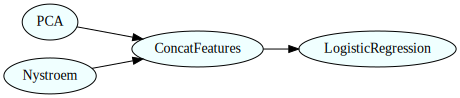

In [3]:
trainable = (pca & nys) >> concat >> lr
# or equivalently: trainable = make_pipeline(make_union(pca, nys), lr)
to_graphviz(trainable)

In [4]:
import sklearn.datasets
from lale.helpers import cross_val_score
digits = sklearn.datasets.load_digits()
X, y = sklearn.utils.shuffle(digits.data, digits.target, random_state=42)
cv_results = cross_val_score(trainable, X, y)
cv_results = ['{0:.1%}'.format(score) for score in cv_results]
print("Accuracy scores during cross validation: {}".format(cv_results))

Accuracy scores during cross validation: ['67.0%', '64.1%', '65.7%', '65.5%', '63.4%']


In [5]:
print_yaml('trainable', trainable.to_json())

trainable:
  class: TrainablePipeline
  edges:
  - [PCA, ConcatFeatures]
  - [Nystroem, ConcatFeatures]
  - [ConcatFeatures, LogisticRegression]
  state: trainable
  steps:
  - class: TrainableIndividualOp
    hyperparams: {copy: true, iterated_power: auto, n_components: 3, random_state: null,
      svd_solver: auto, tol: 0.0, whiten: false}
    operator: PCA
    state: trainable
  - class: TrainableIndividualOp
    hyperparams: {coef0: null, degree: null, gamma: null, kernel: rbf, n_components: 10,
      random_state: null}
    operator: Nystroem
    state: trainable
  - class: TrainableIndividualOp
    hyperparams: {}
    operator: ConcatFeatures
    state: trainable
  - class: TrainableIndividualOp
    hyperparams: {C: 0.1, class_weight: null, dual: false, fit_intercept: true, intercept_scaling: 1.0,
      max_iter: 100, multi_class: auto, n_jobs: null, penalty: l2, random_state: 42,
      solver: liblinear, tol: 0.0001, verbose: 0, warm_start: false}
    operator: LogisticRegressio

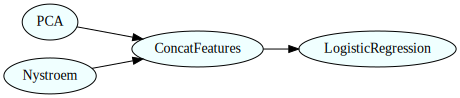

In [6]:
from lale.operators import make_union
from lale.operators import make_pipeline
trainable = make_pipeline(make_union(pca, nys), lr)
to_graphviz(trainable)